# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
record_count = 0
set_count = 1

print('Beginning Data Retrieval')     
print('-----------------------------')

cities_weather = []

for city in cities:
    record_count+=1

    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    if(record_count==50):
        set_count+=1
        record_count=0
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    try:
        response = rq.get(url).json()
        cities_weather.append({'City':city,
                               'Lat':response['coord']['lat'],
                               'Lon':response['coord']['lon'],
                               'Temp':response['main']['temp'],
                               'Humidity':response['main']['humidity'],
                               'Wind':response['wind']['speed'],
                               'Cloudiness':response['clouds']['all'],
                               'Date':response['dt']})
    except:
        print('City not found. Skipping...')
        pass
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | olafsvik
Processing Record 5 of Set 1 | caiaponia
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | gibsons
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | cockburn town
Processing Record 20 of Set 1 | kibala
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | but

Processing Record 42 of Set 4 | sao jose da coroa grande
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | warkworth
Processing Record 46 of Set 4 | erdenet
Processing Record 47 of Set 4 | port augusta
Processing Record 48 of Set 4 | falun
Processing Record 49 of Set 4 | bowen
Processing Record 50 of Set 4 | yasnyy
Processing Record 1 of Set 5 | darlowo
Processing Record 2 of Set 5 | katima mulilo
Processing Record 3 of Set 5 | cabedelo
Processing Record 4 of Set 5 | hun
Processing Record 5 of Set 5 | juifang
City not found. Skipping...
Processing Record 6 of Set 5 | ola
Processing Record 7 of Set 5 | acu
Processing Record 8 of Set 5 | chimay
Processing Record 9 of Set 5 | zambezi
Processing Record 10 of Set 5 | khani
Processing Record 11 of Set 5 | guarapari
Processing Record 12 of Set 5 | divnoye
Processing Record 13 of Set 5 | lebu
Processing Record 14 of Set 5 | north platte
Processin

Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | beira
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | aklavik
Processing Record 35 of Set 8 | roald
Processing Record 36 of Set 8 | kitaibaraki
Processing Record 37 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 8 | oudtshoorn
Processing Record 39 of Set 8 | dzhebariki-khaya
Processing Record 40 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 8 | khargone
Processing Record 42 of Set 8 | usinsk
Processing Record 43 of Set 8 | verkhnyaya inta
Processing Record 44 of Set 8 | bunia
Processing Record 45 of Set 8 | talara
Processing Record 46 of Set 8 | pisco
Processing Record 47 of Set 8 | vao
Processing Record 48 of Set 8 | vanimo
Processing Record 49 of Set 8 | soria
Processing Record 50 of Set 8 | manavalakurichi
Processing Record 1 of Set 9 | golden
Processing Record 2 of Set 9 | aykhal
Processing Record 3 of Set 9 | pitimbu
Pro

Processing Record 16 of Set 12 | riaba
City not found. Skipping...
Processing Record 17 of Set 12 | lovozero
Processing Record 18 of Set 12 | erzin
Processing Record 19 of Set 12 | luderitz
Processing Record 20 of Set 12 | tevaitoa
Processing Record 21 of Set 12 | troy
Processing Record 22 of Set 12 | zwedru
Processing Record 23 of Set 12 | perth
Processing Record 24 of Set 12 | riyadh
Processing Record 25 of Set 12 | odder
Processing Record 26 of Set 12 | northport
Processing Record 27 of Set 12 | dunedin
Processing Record 28 of Set 12 | katangli
Processing Record 29 of Set 12 | margate
Processing Record 30 of Set 12 | dicabisagan
Processing Record 31 of Set 12 | micheweni
Processing Record 32 of Set 12 | masjed-e soleyman
City not found. Skipping...
Processing Record 33 of Set 12 | pacifica
Processing Record 34 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 35 of Set 12 | saint paul
Processing Record 36 of Set 12 | wewak
Processing Record 37 of Set 12 | akureyri


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create DF
weather_df = pd.DataFrame(cities_weather)
weather_df.head()

,City,Lat,Lon,Temp,Humidity,Wind,Cloudiness,Date
0,iqaluit,63.75,-68.51,55.20,76,2.24,75,1595892169
1,bilibino,68.05,166.44,52.45,54,5.50,94,1595892215
2,saint-philippe,-21.36,55.77,61.39,82,4.70,94,1595892111
3,olafsvik,64.89,-23.71,48.36,74,10.65,32,1595891954
4,caiaponia,-16.96,-51.81,68.54,40,2.48,0,1595892216


In [5]:
#send to CSV
weather_df.to_csv("cities.csv")

In [6]:
weather_df.count()

City          549
Lat           549
Lon           549
Temp          549
Humidity      549
Wind          549
Cloudiness    549
Date          549
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
old_data = weather_df.loc[weather_df['Humidity'] > 100].index

In [8]:
clean_data_df = weather_df.drop(old_data, inplace=False)

In [9]:
# Export the City_Data into a csv
clean_data_df.to_csv("clean_cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

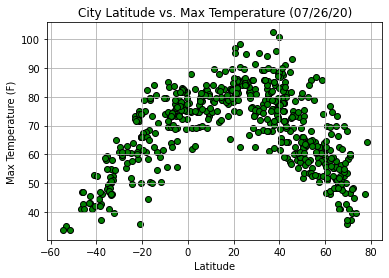

In [10]:
#plot a scatter plot with lat vs temp
plt.scatter(clean_data_df['Lat'], clean_data_df['Temp'], edgecolors='black',facecolors='green')
plt.title('City Latitude vs. Max Temperature (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Lat_vs_Temp.png')
plt.show()

#In this plot you can see the temperature rise as you the latitude comes closer to 0 and then going back down as it goes up.

## Latitude vs. Humidity Plot

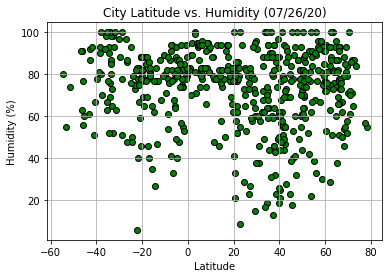

In [11]:
#plot scatter lat vs humd
plt.scatter(clean_data_df['Lat'], clean_data_df['Humidity'], edgecolors='black',facecolors='green')
plt.title('City Latitude vs. Humidity (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Lat_vs_Humd.png')
plt.show()

#In this plot it seems to be very random on huimidity based latitude and there seems to be a much higher humidity across the board.

## Latitude vs. Cloudiness Plot

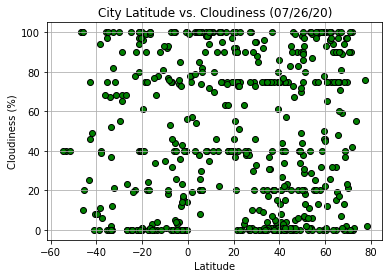

In [12]:
plt.scatter(clean_data_df['Lat'], clean_data_df['Cloudiness'], edgecolors='black',facecolors='green')
plt.title('City Latitude vs. Cloudiness (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Lat_vs_cloud.png')
plt.show()

#There seems to be a either 100% or 0% of cloudiness and less of cloudiness in between.

## Latitude vs. Wind Speed Plot

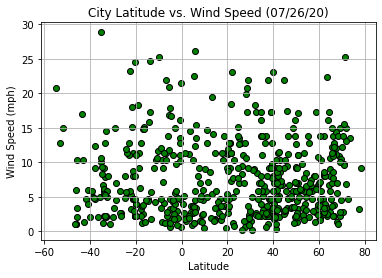

In [13]:
plt.scatter(clean_data_df['Lat'], clean_data_df['Wind'], edgecolors='black',facecolors='green')
plt.title('City Latitude vs. Wind Speed (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('Lat_vs_wind.png')
plt.show()

#The wind speed seems to be random as well based on latitude and this may just be based on time of day in each place.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [25]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_df = clean_data_df.loc[clean_data_df['Lat']>=0.0]


south_hem_df = clean_data_df.loc[clean_data_df['Lat']<0.0]

south_hem_df

,City,Lat,Lon,Temp,Humidity,Wind,Cloudiness,Date
2,saint-philippe,-21.36,55.77,61.39,82,4.70,94,1595892111
4,caiaponia,-16.96,-51.81,68.54,40,2.48,0,1595892216
6,new norfolk,-42.78,147.06,43.30,92,1.34,46,1595892066
9,vaini,-21.20,-175.20,73.40,83,11.41,40,1595892075
10,punta arenas,-53.15,-70.92,35.29,55,12.75,40,1595892074
...,...,...,...,...,...,...,...,...
534,wewak,-3.55,143.63,81.64,74,4.54,85,1595892334
543,pimentel,-6.84,-79.93,62.60,77,21.92,32,1595892336
545,biloela,-24.42,150.50,57.60,48,5.61,0,1595892336
547,namwala,-15.75,26.44,50.14,65,4.45,0,1595892337


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

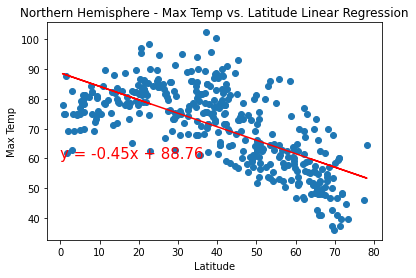

<Figure size 432x288 with 0 Axes>

In [16]:
from scipy.stats import linregress
x_values = north_hem_df['Lat']
y_values = north_hem_df['Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig('North_Hem_MaxTemp_vs_Latitude_Linear.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

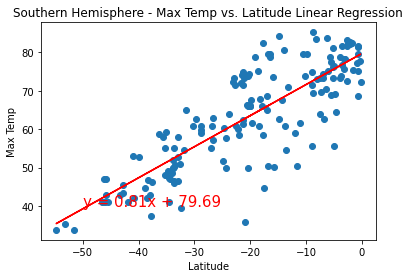

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = south_hem_df['Lat']
y_values = south_hem_df['Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig('South_Hem_MaxTemp_vs_Latitude_Linear.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

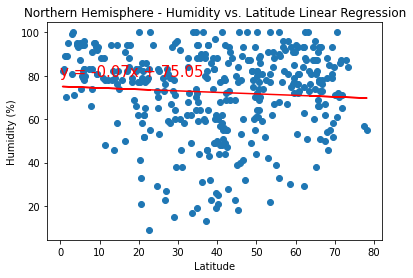

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = north_hem_df['Lat']
y_values = north_hem_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()
plt.savefig('North_Hem_Humidity_vs_Latitude_Linear.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

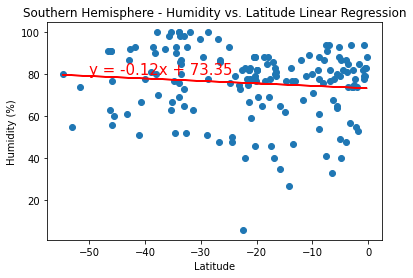

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = south_hem_df['Lat']
y_values = south_hem_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()
plt.savefig('South_Hem_Humidity_vs_Latitude_Linear.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

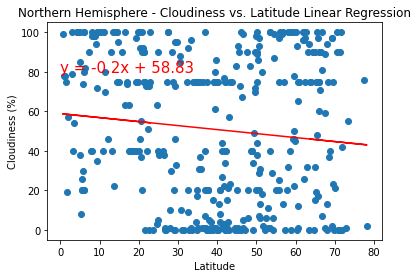

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = north_hem_df['Lat']
y_values = north_hem_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()
plt.savefig('North_Hem_Cloudiness_vs_Latitude_Linear.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

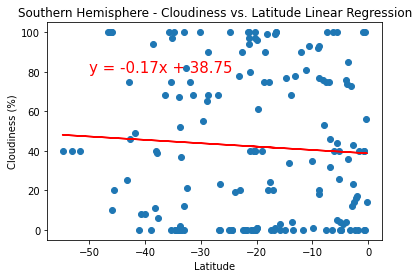

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = south_hem_df['Lat']
y_values = south_hem_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()
plt.savefig('South_Hem_Cloudiness_vs_Latitude_Linear.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

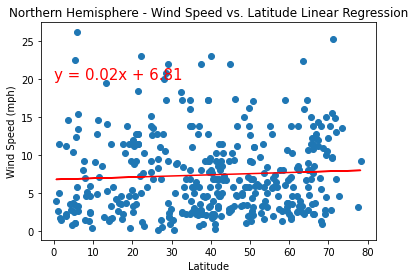

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = north_hem_df['Lat']
y_values = north_hem_df['Wind']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()
plt.savefig('North_Hem_wind_vs_Latitude_Linear.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

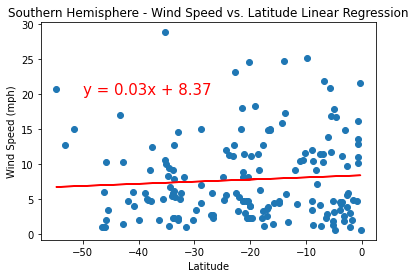

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = south_hem_df['Lat']
y_values = south_hem_df['Wind']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()
plt.savefig('South_Hem_wind_vs_Latitude_Linear.png')

In [24]:
#For Part I, you must include a written description of three observable trends based on the data.

#1.) Based on the random cities selected it is clear that as the latitude moves close to 0 the temp goes up.

#2.) The random cities selected have a very wide range of wind speed, and cloudiness and that could be based on the time of day the code ran. 

#3.) The Humidity seems to be very high in majority of the cities selected and also, out of 570 cities selected 381 of them were on the northen hempisphere.